## NCAA Reg Season Stats
#### This script replicates the correlation procedure from Mark Weiss @ https://www.kaggle.com/virtonos/advanced-basketball-analytics
#### This python script tests correlation among selected calculated stats in the regular season

###### Load Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import seaborn as sns

pd.set_option('display.max_columns', 999)

##### Import Data

In [56]:
os.chdir('C:\\Users\\Jared\\OneDrive\\Documents\\Kaggle\\March Madness 2018\\Data')

In [57]:
df_tourney = pd.read_csv('NCAATourneyCompactResults.csv')
df_season = pd.read_csv('RegularSeasonDetailedResults.csv')
df_teams = pd.read_csv('Teams.csv')
df_seeds = pd.read_csv('NCAATourneySeeds.csv')
df_conferences = pd.read_csv('Conferences.csv')
df_rankings = pd.read_csv('MasseyOrdinals.csv')

##### Regular Season Statistics by Game

In [58]:
# Winning/Losing team possession Stat
# From https://www.nbastuffer.com/analytics101/possession/

wPos = df_season.apply(lambda row: 0.96*(row.WFGA + row.WTO + 0.44*row.WFTA - row.WOR), axis=1)
lPos = df_season.apply(lambda row: 0.96*(row.LFGA + row.LTO + 0.44*row.LFTA - row.LOR), axis=1)

# On average, each team has same number of possessions, so just take average
df_season['Possesions'] = (wPos+lPos)/2
df_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Possesions
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,69.8880
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,65.3568
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,61.3824
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,55.3152
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,60.7680


In [59]:
# Name Player Impact Estimate Definition PIE measures a player's overall statistical contribution
# against the total statistics in games they play in. PIE yields results which are
# comparable to other advanced statistics (e.g. PER) using a simple formula.
# Formula (PTS + FGM + FTM - FGA - FTA + DREB + (.5 * OREB) + AST + STL + (.5 * BLK) - PF - TO)
# / (GmPTS + GmFGM + GmFTM - GmFGA - GmFTA + GmDREB + (.5 * GmOREB) + GmAST + GmSTL + (.5 * GmBLK) - GmPF - GmTO)

wtmp = df_season.apply(lambda row: row.WScore + row.WFGM + row.WFTM - row.WFGA - row.WFTA + row.WDR + 0.5*row.WOR + row.WAst +row.WStl + 0.5*row.WBlk - row.WPF - row.WTO, axis=1)
ltmp = df_season.apply(lambda row: row.LScore + row.LFGM + row.LFTM - row.LFGA - row.LFTA + row.LDR + 0.5*row.LOR + row.LAst +row.LStl + 0.5*row.LBlk - row.LPF - row.LTO, axis=1) 

df_season['WPIE'] = wtmp/(wtmp + ltmp)
df_season['LPIE'] = ltmp/(wtmp + ltmp)
df_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Possesions,WPIE,LPIE
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,69.8880,0.532847,0.467153
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,65.3568,0.602339,0.397661
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,61.3824,0.736434,0.263566
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,55.3152,0.754717,0.245283
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,60.7680,0.570732,0.429268


In [60]:
# Four factors statistic from the NBA
# https://www.nbastuffer.com/analytics101/four-factors/

# Effective Field Goal Percentage=(Field Goals Made) + 0.5*3P Field Goals Made))/(Field Goal Attempts)

df_season['WeFGP'] = df_season.apply(lambda row:(row.WFGM + 0.5 * row.WFGM3) / row.WFGA, axis=1)      
df_season['LeFGP'] = df_season.apply(lambda row:(row.LFGM + 0.5 * row.LFGM3) / row.LFGA, axis=1) 

#Turnover Rate= Turnovers/(Field Goal Attempts + 0.44*Free Throw Attempts + Turnovers)

df_season['WTOR'] = df_season.apply(lambda row: row.WTO / (row.WFGA + 0.44*row.WFTA + row.WTO), axis=1)
df_season['LTOR'] = df_season.apply(lambda row: row.LTO / (row.LFGA + 0.44*row.LFTA + row.LTO), axis=1)


#Offensive Rebounding Percentage = (Offensive Rebounds)/[(Offensive Rebounds)+(Opponent’s Defensive Rebounds)]

df_season['WORP'] = df_season.apply(lambda row: row.WOR / (row.WOR + row.LDR), axis=1)
df_season['LORP'] = df_season.apply(lambda row: row.LOR / (row.LOR + row.WDR), axis=1)

#Free Throw Rate=(Free Throws Made)/(Field Goals Attempted) or Free Throws Attempted/Field Goals Attempted

df_season['WFTAR'] = df_season.apply(lambda row: row.WFTA / row.WFGA, axis=1)
df_season['LFTAR'] = df_season.apply(lambda row: row.LFTA / row.LFGA, axis=1)

#4 Factors is weighted as follows
#1. Shooting (40%)
#2. Turnovers (25%)
#3. Rebounding (20%)
#4. Free Throws (15%)

df_season['W4Factor'] = df_season.apply(lambda row: .40*row.WeFGP + .25*row.WTOR + .20*row.WORP + .15*row.WFTAR, axis=1)
df_season['L4Factor'] = df_season.apply(lambda row: .40*row.LeFGP + .25*row.LTOR + .20*row.LORP + .15*row.LFTAR, axis=1)
df_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Possesions,WPIE,LPIE,WeFGP,LeFGP,WTOR,LTOR,WORP,LORP,WFTAR,LFTAR,W4Factor,L4Factor
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,69.8880,0.532847,0.467153,0.491379,0.433962,0.258659,0.223104,0.388889,0.294118,0.310345,0.415094,0.385546,0.350448
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,65.3568,0.602339,0.397661,0.483871,0.402985,0.155950,0.136674,0.375000,0.416667,0.306452,0.298507,0.353504,0.323472
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,61.3824,0.736434,0.263566,0.482759,0.321918,0.123824,0.126156,0.435897,0.543860,0.500000,0.315068,0.386239,0.316338
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,55.3152,0.754717,0.245283,0.513158,0.428571,0.188561,0.254692,0.230769,0.472222,0.815789,0.306122,0.420926,0.375464
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,60.7680,0.570732,0.429268,0.540984,0.435484,0.173439,0.119218,0.531250,0.488372,0.213115,0.435484,0.397970,0.366995


In [61]:
#Offensive efficiency (OffRtg) =  (Points / Possessions)

df_season['WOffRtg'] = df_season.apply(lambda row: (row.WScore / row.Possesions), axis=1)
df_season['LOffRtg'] = df_season.apply(lambda row: (row.LScore / row.Possesions), axis=1)

#Defensive efficiency (DefRtg) = (Opponent points / Opponent possessions)

df_season['WDefRtg'] = df_season.LOffRtg
df_season['LDefRtg'] = df_season.WOffRtg
                        
#Assist Ratio : Percentage of team possessions that end in assists

df_season['WAstR'] = df_season.apply(lambda row: row.WAst / (row.WFGA + 0.44*row.WFTA + row.WAst + row.WTO), axis=1)
df_season['LAstR'] = df_season.apply(lambda row: row.LAst / (row.LFGA + 0.44*row.LFTA + row.LAst + row.LTO), axis=1)

#DREB% : Percentage of team defensive rebounds

df_season['WDRP'] = df_season.apply(lambda row: row.WDR / (row.WDR + row.LOR), axis=1)
df_season['LDRP'] = df_season.apply(lambda row: row.LDR / (row.LDR + row.WOR), axis=1) 

#Free Throw Percentage

df_season['WFTPCT'] = df_season.apply(lambda row : 0 if row.WFTA < 1 else row.WFTM / row.WFTA, axis=1)
df_season['LFTPCT'] = df_season.apply(lambda row : 0 if row.LFTA < 1 else row.LFTM / row.LFTA, axis=1)
df_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,Possesions,WPIE,LPIE,WeFGP,LeFGP,WTOR,LTOR,WORP,LORP,WFTAR,LFTAR,W4Factor,L4Factor,WOffRtg,LOffRtg,WDefRtg,LDefRtg,WAstR,LAstR,WDRP,LDRP,WFTPCT,LFTPCT
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,69.8880,0.532847,0.467153,0.491379,0.433962,0.258659,0.223104,0.388889,0.294118,0.310345,0.415094,0.385546,0.350448,0.972985,0.887134,0.887134,0.972985,0.127551,0.090212,0.705882,0.611111,0.611111,0.727273
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,65.3568,0.602339,0.397661,0.483871,0.402985,0.155950,0.136674,0.375000,0.416667,0.306452,0.298507,0.353504,0.323472,1.071044,0.963939,0.963939,1.071044,0.161031,0.073840,0.583333,0.625000,0.526316,0.450000
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,61.3824,0.736434,0.263566,0.482759,0.321918,0.123824,0.126156,0.435897,0.543860,0.500000,0.315068,0.386239,0.316338,1.189266,0.993770,0.993770,1.189266,0.156642,0.086439,0.456140,0.564103,0.586207,0.608696
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,55.3152,0.754717,0.245283,0.513158,0.428571,0.188561,0.254692,0.230769,0.472222,0.815789,0.306122,0.420926,0.375464,1.012380,0.903911,0.903911,1.012380,0.147374,0.107656,0.527778,0.769231,0.548387,0.533333
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,60.7680,0.570732,0.429268,0.540984,0.435484,0.173439,0.119218,0.531250,0.488372,0.213115,0.435484,0.397970,0.366995,1.267114,1.168378,1.168378,1.267114,0.129422,0.125156,0.511628,0.468750,0.846154,0.629630


In [62]:
# remove unwanted stats
df_season.drop(['WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF'], axis=1, inplace=True)
df_season.drop(['LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'], axis=1, inplace=True)
df_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,Possesions,WPIE,LPIE,WeFGP,LeFGP,WTOR,LTOR,WORP,LORP,WFTAR,LFTAR,W4Factor,L4Factor,WOffRtg,LOffRtg,WDefRtg,LDefRtg,WAstR,LAstR,WDRP,LDRP,WFTPCT,LFTPCT
0,2003,10,1104,68,1328,62,N,0,69.8880,0.532847,0.467153,0.491379,0.433962,0.258659,0.223104,0.388889,0.294118,0.310345,0.415094,0.385546,0.350448,0.972985,0.887134,0.887134,0.972985,0.127551,0.090212,0.705882,0.611111,0.611111,0.727273
1,2003,10,1272,70,1393,63,N,0,65.3568,0.602339,0.397661,0.483871,0.402985,0.155950,0.136674,0.375000,0.416667,0.306452,0.298507,0.353504,0.323472,1.071044,0.963939,0.963939,1.071044,0.161031,0.073840,0.583333,0.625000,0.526316,0.450000
2,2003,11,1266,73,1437,61,N,0,61.3824,0.736434,0.263566,0.482759,0.321918,0.123824,0.126156,0.435897,0.543860,0.500000,0.315068,0.386239,0.316338,1.189266,0.993770,0.993770,1.189266,0.156642,0.086439,0.456140,0.564103,0.586207,0.608696
3,2003,11,1296,56,1457,50,N,0,55.3152,0.754717,0.245283,0.513158,0.428571,0.188561,0.254692,0.230769,0.472222,0.815789,0.306122,0.420926,0.375464,1.012380,0.903911,0.903911,1.012380,0.147374,0.107656,0.527778,0.769231,0.548387,0.533333
4,2003,11,1400,77,1208,71,N,0,60.7680,0.570732,0.429268,0.540984,0.435484,0.173439,0.119218,0.531250,0.488372,0.213115,0.435484,0.397970,0.366995,1.267114,1.168378,1.168378,1.267114,0.129422,0.125156,0.511628,0.468750,0.846154,0.629630


##### Regular Season Statistics - composite for each team

In [63]:
df_season_composite = pd.DataFrame()

#calculates wins and losses to get winning percentage

df_season_composite['WINS'] = df_season['WTeamID'].groupby([df_season['Season'], df_season['WTeamID']]).count()
df_season_composite['LOSSES'] = df_season['LTeamID'].groupby([df_season['Season'], df_season['LTeamID']]).count()
df_season_composite['WINPCT'] = df_season_composite['WINS'] / (df_season_composite['WINS'] + df_season_composite['LOSSES'])

# calculates averages for games team won

df_season_composite['WPIE'] = df_season['WPIE'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WeFGP'] = df_season['WeFGP'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WTOR'] = df_season['WTOR'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WORP'] = df_season['WORP'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WFTAR'] = df_season['WFTAR'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['W4Factor'] = df_season['W4Factor'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WOffRtg'] = df_season['WOffRtg'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WDefRtg'] = df_season['WDefRtg'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WAstR'] = df_season['WAstR'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WDRP'] = df_season['WDRP'].groupby([df_season['Season'], df_season['WTeamID']]).mean()
df_season_composite['WFTPCT'] = df_season['WFTPCT'].groupby([df_season['Season'], df_season['WTeamID']]).mean()

# calculates averages for games team lost

df_season_composite['LPIE'] = df_season['LPIE'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LeFGP'] = df_season['LeFGP'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LTOR'] = df_season['LTOR'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LORP'] = df_season['LORP'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LFTAR'] = df_season['LFTAR'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['L4Factor'] = df_season['L4Factor'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LOffRtg'] = df_season['LOffRtg'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LDefRtg'] = df_season['LDefRtg'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LAstR'] = df_season['LAstR'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LDRP'] = df_season['LDRP'].groupby([df_season['Season'], df_season['LTeamID']]).mean()
df_season_composite['LFTPCT'] = df_season['LFTPCT'].groupby([df_season['Season'], df_season['LTeamID']]).mean()

# calculates weighted average using winning percent to weight the statistic

df_season_composite['PIE'] = df_season_composite['WPIE'] * df_season_composite['WINPCT'] + df_season_composite['LPIE'] * (1 - df_season_composite['WINPCT'])
df_season_composite['FG_PCT'] = df_season_composite['WeFGP'] * df_season_composite['WINPCT'] + df_season_composite['LeFGP'] * (1 - df_season_composite['WINPCT'])
df_season_composite['TURNOVER_RATE'] = df_season_composite['WTOR'] * df_season_composite['WINPCT'] + df_season_composite['LTOR'] * (1 - df_season_composite['WINPCT'])
df_season_composite['OFF_REB_PCT'] = df_season_composite['WORP'] * df_season_composite['WINPCT'] + df_season_composite['LORP'] * (1 - df_season_composite['WINPCT'])
df_season_composite['FT_RATE'] = df_season_composite['WFTAR'] * df_season_composite['WINPCT'] + df_season_composite['LFTAR'] * (1 - df_season_composite['WINPCT'])
df_season_composite['4FACTOR'] = df_season_composite['W4Factor'] * df_season_composite['WINPCT'] + df_season_composite['L4Factor'] * (1 - df_season_composite['WINPCT'])
df_season_composite['OFF_EFF'] = df_season_composite['WOffRtg'] * df_season_composite['WINPCT'] + df_season_composite['LOffRtg'] * (1 - df_season_composite['WINPCT'])
df_season_composite['DEF_EFF'] = df_season_composite['WDefRtg'] * df_season_composite['WINPCT'] + df_season_composite['LDefRtg'] * (1 - df_season_composite['WINPCT'])
df_season_composite['ASSIST_RATIO'] = df_season_composite['WAstR'] * df_season_composite['WINPCT'] + df_season_composite['LAstR'] * (1 - df_season_composite['WINPCT'])
df_season_composite['DEF_REB_PCT'] = df_season_composite['WDRP'] * df_season_composite['WINPCT'] + df_season_composite['LDRP'] * (1 - df_season_composite['WINPCT'])
df_season_composite['FT_PCT'] = df_season_composite['WFTPCT'] * df_season_composite['WINPCT'] + df_season_composite['LFTPCT'] * (1 - df_season_composite['WINPCT'])

df_season_composite.reset_index(inplace = True)
df_season_composite.head()

,Season,WTeamID,WINS,LOSSES,WINPCT,WPIE,WeFGP,WTOR,WORP,WFTAR,W4Factor,WOffRtg,WDefRtg,WAstR,WDRP,WFTPCT,LPIE,LeFGP,LTOR,LORP,LFTAR,L4Factor,LOffRtg,LDefRtg,LAstR,LDRP,LFTPCT,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT
0,2003,1102,12,16.0,0.428571,0.755263,0.692162,0.182036,0.172188,0.541714,0.438068,1.272283,0.977791,0.218356,0.636526,0.631688,0.288600,0.503591,0.201436,0.165271,0.375427,0.341164,0.960527,1.177594,0.147840,0.625778,0.650437,0.488599,0.584407,0.193121,0.168235,0.446693,0.382694,1.094137,1.091964,0.178061,0.630384,0.642402
1,2003,1103,13,14.0,0.481481,0.615446,0.592604,0.155195,0.318510,0.554488,0.422715,1.262113,1.128021,0.178446,0.620109,0.722603,0.411540,0.484527,0.164085,0.294003,0.382163,0.350957,1.077651,1.196595,0.141322,0.633394,0.747034,0.509717,0.536564,0.159805,0.305803,0.465135,0.385508,1.166466,1.163578,0.159196,0.626998,0.735271
2,2003,1104,17,11.0,0.607143,0.657820,0.506056,0.160278,0.367049,0.392488,0.374775,1.144805,0.942605,0.147173,0.703299,0.709384,0.349042,0.429002,0.178087,0.377756,0.341227,0.342858,1.004336,1.162852,0.105963,0.661550,0.698651,0.536514,0.475785,0.167275,0.371256,0.372350,0.362236,1.089621,1.029131,0.130983,0.686897,0.705168
3,2003,1105,7,19.0,0.269231,0.641277,0.488400,0.197495,0.383144,0.425332,0.385163,1.078629,0.903268,0.147308,0.667596,0.743782,0.331704,0.446777,0.211586,0.317489,0.335248,0.345392,0.951410,1.110672,0.134965,0.631796,0.697004,0.415050,0.457983,0.207792,0.335166,0.359501,0.356100,0.985661,1.054833,0.138288,0.641434,0.709598
4,2003,1106,13,15.0,0.464286,0.741382,0.517668,0.220207,0.378952,0.395797,0.397279,1.041100,0.882626,0.137635,0.714061,0.591138,0.342262,0.450522,0.208100,0.323938,0.231093,0.331685,0.939576,1.085628,0.116900,0.649253,0.650908,0.527568,0.481697,0.213721,0.349480,0.307563,0.362140,0.986712,0.991377,0.126527,0.679342,0.623158


In [64]:
# Search for undefeated teams... this will cause problems with stats
df_season_composite[df_season_composite['LOSSES'].isnull()]

,Season,WTeamID,WINS,LOSSES,WINPCT,WPIE,WeFGP,WTOR,WORP,WFTAR,W4Factor,WOffRtg,WDefRtg,WAstR,WDRP,WFTPCT,LPIE,LeFGP,LTOR,LORP,LFTAR,L4Factor,LOffRtg,LDefRtg,LAstR,LDRP,LFTPCT,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT
4064,2014,1455,33,NaN,NaN,0.697612,0.523191,0.137994,0.353977,0.479304,0.386466,1.222681,0.974460,0.149764,0.74727,0.731159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4211,2015,1246,34,NaN,NaN,0.809886,0.520134,0.137713,0.402745,0.451499,0.390756,1.221053,0.881479,0.158968,0.68447,0.719838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Need to manually adjust for teams that went undefeated (Kentucky - 2014 & Witchita State - 2015)

df_season_composite.loc[4064,'WINPCT'] = 1
df_season_composite.loc[4064,'LOSSES'] = 0
df_season_composite.loc[4064,'PIE'] = df_season_composite.loc[4064,'WPIE']
df_season_composite.loc[4064,'FG_PCT'] = df_season_composite.loc[4064,'WeFGP']
df_season_composite.loc[4064,'TURNOVER_RATE'] = df_season_composite.loc[4064,'WTOR']
df_season_composite.loc[4064,'OFF_REB_PCT'] = df_season_composite.loc[4064,'WORP']
df_season_composite.loc[4064,'FT_RATE'] = df_season_composite.loc[4064,'WFTAR']
df_season_composite.loc[4064,'4FACTOR'] = df_season_composite.loc[4064,'W4Factor']
df_season_composite.loc[4064,'OFF_EFF'] = df_season_composite.loc[4064,'WOffRtg']
df_season_composite.loc[4064,'DEF_EFF'] = df_season_composite.loc[4064,'WDefRtg']
df_season_composite.loc[4064,'ASSIST_RATIO'] = df_season_composite.loc[4064,'WAstR']
df_season_composite.loc[4064,'DEF_REB_PCT'] = df_season_composite.loc[4064,'WDRP']
df_season_composite.loc[4064,'FT_PCT'] = df_season_composite.loc[4064,'WFTPCT']

df_season_composite.loc[4211,'WINPCT'] = 1
df_season_composite.loc[4211,'LOSSES'] = 0
df_season_composite.loc[4211,'PIE'] = df_season_composite.loc[4211,'WPIE']
df_season_composite.loc[4211,'FG_PCT'] = df_season_composite.loc[4211,'WeFGP']
df_season_composite.loc[4211,'TURNOVER_RATE'] = df_season_composite.loc[4211,'WTOR']
df_season_composite.loc[4211,'OFF_REB_PCT'] = df_season_composite.loc[4211,'WORP']
df_season_composite.loc[4211,'FT_RATE'] = df_season_composite.loc[4211,'WFTAR']
df_season_composite.loc[4211,'4FACTOR'] = df_season_composite.loc[4211,'W4Factor']
df_season_composite.loc[4211,'OFF_EFF'] = df_season_composite.loc[4211,'WOffRtg']
df_season_composite.loc[4211,'DEF_EFF'] = df_season_composite.loc[4211,'WDefRtg']
df_season_composite.loc[4211,'ASSIST_RATIO'] = df_season_composite.loc[4211,'WAstR']
df_season_composite.loc[4211,'DEF_REB_PCT'] = df_season_composite.loc[4211,'WDRP']
df_season_composite.loc[4211,'FT_PCT'] = df_season_composite.loc[4211,'WFTPCT']

In [66]:
# clean up composite file - only need weighted average stats, not Win & Loss stats

df_season_composite.drop(['WINS','WPIE','WeFGP','WTOR','WORP','WFTAR','W4Factor','WOffRtg','WDefRtg','WAstR','WDRP','WFTPCT'], axis=1, inplace=True)
df_season_composite.drop(['LOSSES','LPIE','LeFGP','LTOR','LORP','LFTAR','L4Factor','LOffRtg','LDefRtg','LAstR','LDRP','LFTPCT'], axis=1, inplace=True)
df_season_composite.head()

,Season,WTeamID,WINPCT,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT
0,2003,1102,0.428571,0.488599,0.584407,0.193121,0.168235,0.446693,0.382694,1.094137,1.091964,0.178061,0.630384,0.642402
1,2003,1103,0.481481,0.509717,0.536564,0.159805,0.305803,0.465135,0.385508,1.166466,1.163578,0.159196,0.626998,0.735271
2,2003,1104,0.607143,0.536514,0.475785,0.167275,0.371256,0.372350,0.362236,1.089621,1.029131,0.130983,0.686897,0.705168
3,2003,1105,0.269231,0.415050,0.457983,0.207792,0.335166,0.359501,0.356100,0.985661,1.054833,0.138288,0.641434,0.709598
4,2003,1106,0.464286,0.527568,0.481697,0.213721,0.349480,0.307563,0.362140,0.986712,0.991377,0.126527,0.679342,0.623158


In [67]:
# Clean up composite file to help with correlation matrix

columns = list(df_season_composite.columns.values) 
columns.pop(columns.index('WINPCT')) 
columns.append('WINPCT')
df_season_composite = df_season_composite[columns]
df_season_composite.rename(columns={'WTeamID':'TeamID'}, inplace=True)
df_season_composite.head()

,Season,TeamID,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT
0,2003,1102,0.488599,0.584407,0.193121,0.168235,0.446693,0.382694,1.094137,1.091964,0.178061,0.630384,0.642402,0.428571
1,2003,1103,0.509717,0.536564,0.159805,0.305803,0.465135,0.385508,1.166466,1.163578,0.159196,0.626998,0.735271,0.481481
2,2003,1104,0.536514,0.475785,0.167275,0.371256,0.372350,0.362236,1.089621,1.029131,0.130983,0.686897,0.705168,0.607143
3,2003,1105,0.415050,0.457983,0.207792,0.335166,0.359501,0.356100,0.985661,1.054833,0.138288,0.641434,0.709598,0.269231
4,2003,1106,0.527568,0.481697,0.213721,0.349480,0.307563,0.362140,0.986712,0.991377,0.126527,0.679342,0.623158,0.464286


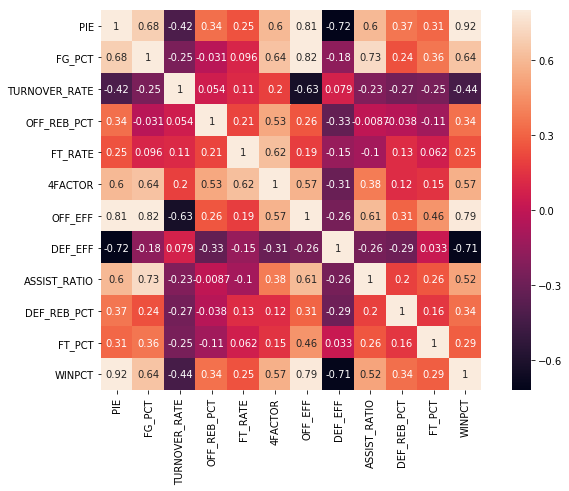

In [68]:
# Build the correlation matrix

corrmatrix = df_season_composite.iloc[:, 2:].corr()
f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corrmatrix, vmax=.8, cbar=True, annot=True, square=True);

In [69]:
# Print CSV with consolidated stats
df_season_composite.to_csv('RegularSeasonCompositeStats.csv', index=False)

### Build file for tournament teams 
##### Incorporate Strength of Schedule (using RPI)

In [70]:
# Rating Percentage Index (RPI) Formula=.25*(Team’s Winning Percentage)+
# .50*(Opponents’  Average Winning Percentage)+0.25*(Opponents’ Opponents’  Average Winning Percentage)

df_RPI = df_rankings[df_rankings['SystemName'] == 'RPI']
df_RPI_final = df_RPI[df_RPI['RankingDayNum'] == 133]
df_RPI_final.drop(labels=['RankingDayNum', 'SystemName'], inplace=True, axis=1)
df_RPI_final.head()

C:\Users\Jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Season,TeamID,OrdinalRank
127586,2003,1102,158
127587,2003,1103,182
127588,2003,1104,38
127589,2003,1105,313
127590,2003,1106,248


In [71]:
# incorporate seeding for tournament teams

df_seeds['seed_int'] = df_seeds['Seed'].apply( lambda x : int(x[1:3]) )
df_seeds.drop(labels=['Seed'], inplace=True, axis=1) 
df_seeds.rename(columns={'seed_int':'Seed'},inplace=True)
df_seeds_final = df_seeds[df_seeds['Season'] > 2002]
df_seeds_final.head()

,Season,TeamID,Seed
1154,2003,1328,1
1155,2003,1448,2
1156,2003,1393,3
1157,2003,1257,4
1158,2003,1280,5


##### Merge Seeding and BPI with Regular Season Stats (Tournament Teams Only)

In [72]:
df_tourney_stage = pd.merge(left=df_seeds_final, right=df_RPI_final, how='left', on=['Season', 'TeamID'])
df_tourney_final = pd.merge(left=df_tourney_stage, right=df_season_composite, how='left', on=['Season', 'TeamID'])
df_tourney_final.head()

,Season,TeamID,Seed,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT
0,2003,1328,1,3,0.604965,0.512124,0.155078,0.347284,0.332030,0.362880,1.141774,0.970563,0.153606,0.709854,0.714351,0.800000
1,2003,1448,2,7,0.637398,0.511972,0.178941,0.429724,0.472499,0.406344,1.181855,1.021376,0.147679,0.687237,0.755330,0.827586
2,2003,1393,3,9,0.604162,0.515151,0.160408,0.385242,0.393873,0.382292,1.159225,1.015128,0.146059,0.630790,0.687824,0.827586
3,2003,1257,4,11,0.633058,0.528861,0.156505,0.356053,0.418922,0.384719,1.183940,0.988304,0.162239,0.664037,0.690997,0.800000
4,2003,1280,5,24,0.643001,0.521359,0.197467,0.383446,0.323860,0.383178,1.099648,0.948850,0.154033,0.695785,0.666941,0.700000


In [73]:
# generate teams in the tourney

df_tourney.drop(labels=['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], inplace=True, axis=1)
df_tourney = pd.merge(left=df_tourney, right=df_seeds, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
df_tourney = pd.merge(left=df_tourney, right=df_seeds, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
df_tourney.drop(labels=['TeamID_x', 'TeamID_y'], inplace=True, axis=1)
df_tourney.rename(columns={'Seed_x':'WSeed', 'Seed_y':'LSeed'},inplace=True)
df_tourney.head()

,Season,WTeamID,LTeamID,WSeed,LSeed
0,1985,1116,1234,9,8
1,1985,1120,1345,11,6
2,1985,1207,1250,1,16
3,1985,1229,1425,9,8
4,1985,1242,1325,3,14


In [74]:
# generate teams in tourney from 2003-2017

df_tourney_list = df_tourney[df_tourney['Season'] > 2002]
df_tourney_list.drop(labels=['WSeed', 'LSeed'], inplace=True, axis=1)
df_tourney_list.reset_index(inplace = True, drop=True)
df_tourney_list.head()

C:\Users\Jared\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Season,WTeamID,LTeamID
0,2003,1421,1411
1,2003,1112,1436
2,2003,1113,1272
3,2003,1141,1166
4,2003,1143,1301


##### File prediction file to use in ML

In [75]:
# get the features for the winning team

df_model_winners = pd.merge(left=df_tourney_list, right=df_tourney_final ,how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
df_model_winners.drop(labels=['TeamID'], inplace=True, axis=1)

# get the features for the lossing team

df_model_losers = pd.merge(left=df_tourney_list, right=df_tourney_final ,how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
df_model_losers.drop(labels=['TeamID'], inplace=True, axis=1)

# calculate difference between win team and lose team
df_model_winner_diff = (df_model_winners.iloc[:, 3:] - df_model_losers.iloc[:, 3:])
df_model_winner_diff['result'] = 1
df_model_winner_diff = pd.merge(left=df_model_winner_diff, right=df_tourney_list, left_index=True, right_index=True, how='inner')

# calculate difference between lose team and win team
df_model_loser_diff = (df_model_losers.iloc[:, 3:] - df_model_winners.iloc[:, 3:])
df_model_loser_diff['result'] = 0
df_model_loser_diff = pd.merge(left=df_model_loser_diff, right=df_tourney_list, left_index=True, right_index=True, how='inner')

# combine winner and loser files to create prediction file

df_predictions_tourney = pd.concat((df_model_winner_diff, df_model_loser_diff), axis=0)
df_predictions_tourney.sort_values('Season', inplace=True)
df_predictions_tourney.reset_index(inplace = True, drop=True)
df_predictions_tourney.head()

,Seed,OrdinalRank,PIE,FG_PCT,TURNOVER_RATE,OFF_REB_PCT,FT_RATE,4FACTOR,OFF_EFF,DEF_EFF,ASSIST_RATIO,DEF_REB_PCT,FT_PCT,WINPCT,result,Season,WTeamID,LTeamID
0,0,-31,-0.107021,-0.013235,0.012414,-0.012949,-0.152277,-0.027622,-0.011714,0.114730,-0.008846,-0.056104,0.152397,-0.151724,1,2003,1421,1411
1,11,46,-0.013858,-0.014261,0.011557,-0.052423,0.032148,-0.008478,-0.036868,-0.022519,-0.002358,0.027260,0.100614,-0.034483,0,2003,1393,1264
2,-1,9,0.082039,0.067915,0.003750,0.025868,-0.113316,0.016280,0.055471,-0.009768,0.039910,-0.004268,-0.103694,0.034562,0,2003,1345,1261
3,13,95,-0.154728,-0.025687,-0.007815,0.001559,-0.096460,-0.026386,-0.013971,0.158266,-0.018119,-0.032008,0.083997,-0.189247,0,2003,1338,1447
4,5,37,0.032360,0.069025,-0.003349,-0.055668,-0.040919,0.009501,0.090988,0.011822,0.037968,0.091727,0.036850,0.125160,0,2003,1329,1335


In [76]:
# Print CSV with Tourney Prediction Stats
df_predictions_tourney.to_csv('TourneyCompositeStats.csv', index=False)